# IMPORTS AND LIBRARIES

**PYTHON**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.express as ex
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataframe='https://raw.githubusercontent.com/Tinu-A/DA/main/BankChurn.csv'

In [ ]:
#Importing Raw data from Github
bank_churn=pd.read_csv(dataframe)


**SQL**

In [ ]:
import sqlite3
df_sql='https://raw.githubusercontent.com/Tinu-A/DA/main/BankChurn.csv'

In [ ]:
#read the CSV
df=pd.read_csv(df_sql)
#connect to a database
conn = sqlite3.connect("test_db.db") #if the db does not exist, this creates a Any_Database_Name.db file in the current directory
#store your table in the database:
df.to_sql ('df_sql', conn )
#read a SQL Query out of your database and into a pandas dataframe

10127

# Dataframe Overview and Data Cleaning: Python

Examining dataframe

In [ ]:
#Summary of data rows and columns
bank_churn.shape

(10127, 23)

In [ ]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
#Check for missing vaules: data is has no blank coloumns or rows.
#It is evident that we will be examining the data of 10127 customers in total.
bank_churn.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
#Data set consists of object, intergers and floats.
bank_churn.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [ ]:
#The last 2 columns of the original dataframe has been dropped as they are not relevant for this analysis.
#Cleaned dataframe will be renamed as bank_churners
bank_churners = bank_churn.drop(bank_churn.columns[[21,22]], axis=1)


In [ ]:
#Cleaned dataframe
bank_churners.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
bank_churners.shape

(10127, 21)

In [ ]:
#Overview of numerical columns
bank_churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
#Overview of columns that contains integers and strings
bank_churners.describe(include=['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


# OBJECTIVE 1:How many customers have churned?

In [ ]:
bank_churners['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

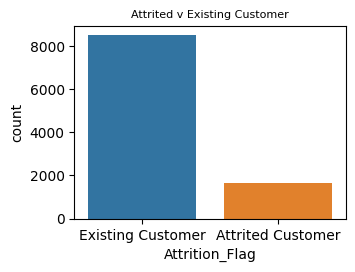

In [ ]:
plt.figure(figsize=(3.5,2.5))
sns.countplot(x='Attrition_Flag', data=bank_churners)
plt.title('Attrited v Existing Customer', fontsize=8)
plt.show()

In [ ]:
px.pie(bank_churners,names='Attrition_Flag',title='Perecent Distribution', width=600, height=300)


**Out of 10127 total accounts, 1627 customers have churned, at 16.1%**

# OBJECTIVE 2: How does churn (attrition) look across the different Demographics and Customer Profile?

**Age**

The histogram indicates that majority of credit card users are in their mid 40s-mid 50s, with indivials age 70+ being the miniority. It also hihlights the increase in credit card users as the age range increase, peaks at 45-55 and then a steady decrease.

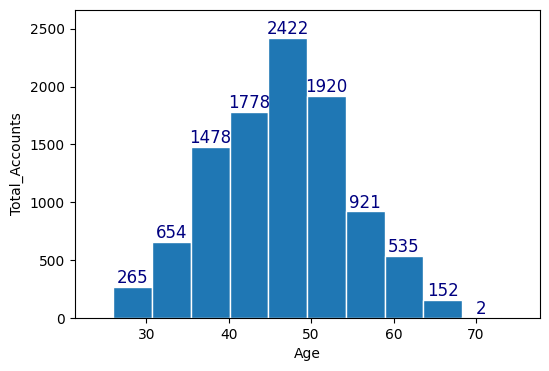

In [ ]:
plt.figure(figsize=(6,4))
values, bins, bars = plt.hist(bank_churners['Customer_Age'], edgecolor='white')
plt.xlabel("Age")
plt.ylabel("Total_Accounts")
plt.bar_label(bars, fontsize=12, color='navy')
plt.margins(x=0.1, y=0.1)

In [ ]:
#Examining the churn rate within different age range
age_range= pd.read_sql_query("""
SELECT
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS
Attrited_Accounts, COUNT (*) AS Total_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS FLOAT))/COUNT(*)*100
AS Churn_Rate,
SUM(CAST(Attrition_Flag = 'Existing Customer'AS FLOAT))/COUNT(*)*100
AS Retention_Rate,
CASE
WHEN Customer_Age <30 THEN '20-30'
WHEN Customer_Age <40 THEN '30-40'
WHEN Customer_Age <50 THEN '40-50'
WHEN Customer_Age <60 THEN '50-60'
ELSE '60+'
End AS Age_Range
FROM `df_sql`
GROUP BY Age_Range
ORDER BY Age_Range ASC
""", conn)

In [ ]:
cm = sns.light_palette("navy", as_cmap=True)
age_range.style.background_gradient(cmap=cm)


,Attrited_Accounts,Total_Accounts,Churn_Rate,Retention_Rate,Age_Range
0,17,195,8.717949,91.282051,20-30
1,261,1841,14.177078,85.822922,30-40
2,772,4561,16.926113,83.073887,40-50
3,506,2998,16.877919,83.122081,50-60
4,71,532,13.345865,86.654135,60+


The churn rate is at the lowest (8.7%) within age group 20-30, and at the highest amongst 40-60s at an average of (16.9%) then decrease 60+. One could speculate that customer in their 40-60s have a higher churn rate due to factors such as competitive offers from other banking institutes, e.g., 0% balance transfers, 0% interest on purchase etc.

**Gender**

In [ ]:

bank_churners['Gender'].value_counts()

In [ ]:
#Gender distrubution of existing and attrited accounts
plt.figure(figsize=(6,3.5))
sns.countplot(x='Gender', hue = 'Attrition_Flag', data = bank_churners)
plt.title('Gender and Customer Status', fontsize=10)
plt.legend(loc=(1.05, 0.5))



In [ ]:
#Attrition rate across by Gender
gender_attrition= pd.read_sql_query("""
SELECT
Gender,
COUNT (*) AS Total_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS
Attrited_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS FLOAT))/COUNT(*)*100
AS Churn_Rate,
SUM(CAST(Attrition_Flag = 'Existing Customer'AS FLOAT))/COUNT(*)*100
AS Retention_Rate
FROM `df_sql`
GROUP BY Gender
ORDER BY Churn_Rate ASC
""", conn)


In [ ]:
cm = sns.light_palette("teal", as_cmap=True)
gender_attrition.style.background_gradient(cmap=cm)

,Gender,Total_Accounts,Attrited_Accounts,Churn_Rate,Retention_Rate
0,M,4769,697,14.615223,85.384777
1,F,5358,930,17.357223,82.642777


In [ ]:
ex.pie (bank_churners, names='Gender',title='Gender Distribution', width=300, height=400)


Overall, female customers have the highest churn rate at 17.36% with a population of 52.9%. Conversely, male customers who account for 47.1% of the data poplulation have a churn rate of 14.62%.

Text(0.5, 1.0, 'Marital Status and Atrrition')

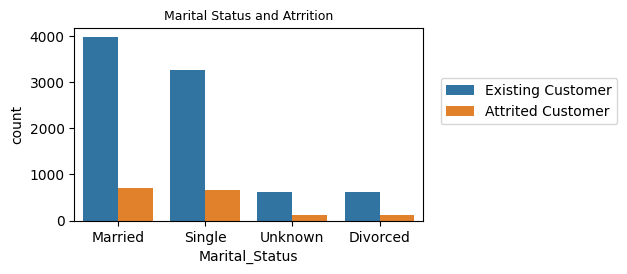

In [ ]:
#Martital Status and Attrition
plt.figure(figsize=(4.5,2.5))
sns.countplot(x='Marital_Status', hue = 'Attrition_Flag', data = bank_churners)
plt.legend(loc=(1.05, 0.5))
plt.title('Marital Status and Atrrition', fontsize=9)


In [ ]:
marital_status= pd.read_sql_query("""
SELECT
Marital_Status,
COUNT (*) AS Total_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS
Attrited_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS FLOAT))/COUNT(*)*100
AS Churn_Rate,
SUM(CAST(Attrition_Flag = 'Existing Customer'AS FLOAT))/COUNT(*)*100
AS Retention_Rate
FROM `df_sql`
GROUP BY Marital_Status
ORDER BY Churn_Rate ASC
""", conn)


In [ ]:
cm = sns.light_palette("brown", as_cmap=True)
marital_status.style.background_gradient(cmap=cm)

,Marital_Status,Total_Accounts,Attrited_Accounts,Churn_Rate,Retention_Rate
0,Married,4687,709,15.126947,84.873053
1,Divorced,748,121,16.176471,83.823529
2,Single,3943,668,16.941415,83.058585
3,Unknown,749,129,17.222964,82.777036


Marital status churn rate ranges between 15.12-17.22%, as 17% of customers that churn have unknown marital status, one cannot conclude wether marital status affects churn rate.

**Education**

In [ ]:
education_churn= pd.read_sql_query ("""
SELECT
Education_Level,
COUNT (*) AS Total_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS
Attrited_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS FLOAT))/COUNT(*)*100
AS Churn_Rate,
SUM(CAST(Attrition_Flag = 'Existing Customer'AS FLOAT))/COUNT(*)*100
AS Retention_Rate
FROM `df_sql`
GROUP BY Education_Level
ORDER BY Churn_Rate ASC
""", conn)


In [ ]:
cm = sns.light_palette("red", as_cmap=True)
education_churn.style.background_gradient(cmap=cm)

,Education_Level,Total_Accounts,Attrited_Accounts,Churn_Rate,Retention_Rate
0,High School,2013,306,15.201192,84.798808
1,College,1013,154,15.202369,84.797631
2,Graduate,3128,487,15.569054,84.430946
3,Uneducated,1487,237,15.938130,84.061870
4,Unknown,1519,256,16.853193,83.146807
5,Post-Graduate,516,92,17.829457,82.170543
6,Doctorate,451,95,21.064302,78.935698


The table indicates a positive correlation between education level and churn rate. A signigicant increase in churn can be seen with Customers holding a Doctorate degree. It calls to question if these customer are being offered  better perks from different banks or other variables is at pay.

**Dependent**

<Figure size 450x300 with 0 Axes>

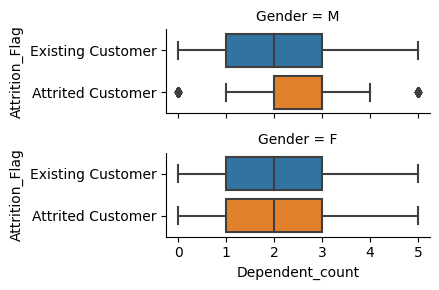

In [ ]:
plt.figure(figsize=(4.5,3))
sns.catplot(x="Dependent_count", y="Attrition_Flag", row="Gender", kind="box", data=bank_churners, height=1.5,aspect=3., orient='h')

The plot indicates that number of dependent has no impact on churn rate.

# **Objective 3: How does the services provided by the bank and card utilisation affect churn rate?**

**Card Category, income and utilisation**

In [ ]:
Utilisation=bank_churners.groupby(['Card_Category', 'Income_Category'])['Avg_Utilization_Ratio'].mean().sort_values(ascending=False)
Utilisation.plot(kind='bar')
plt.title('Card Category and Income Average Utilisation',fontsize=8)
plt.fig = ([4, 2.5])


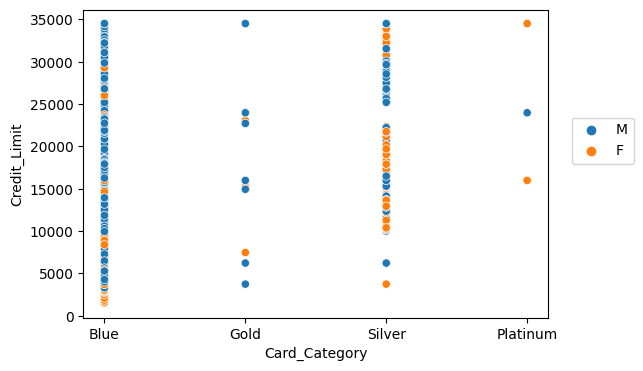

In [ ]:
#Card Category and Credit Limit by Gender
plt.figure(figsize=(6,4))
x=sns.scatterplot(x="Card_Category",
                y="Credit_Limit",
                data=bank_churners,
                hue= "Gender")
plt.legend(loc=(1.05, 0.5))

The highest utilisation rate can be seen with Blue card holders earning less than 40-60k. Contrastingly, customers with plantinum card earning between 40-60k or with unknown salary have the lowest utilisation rate.

**Bank Contact**

Text(0.5, 1.0, 'Bank contact and Customer Attrition')

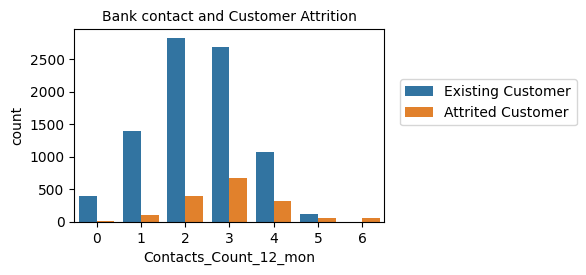

In [ ]:
plt.figure(figsize=(4,2.5))
sns.countplot(x='Contacts_Count_12_mon', hue = 'Attrition_Flag', data = bank_churners)
plt.legend(loc=(1.05, 0.5))
plt.title('Bank contact and Customer Attrition', fontsize=10)


In [ ]:
contact_rate= pd.read_sql_query ("""
SELECT
Contacts_Count_12_mon AS Contact_Rate,
COUNT (*) AS Total_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS
Attrited_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS FLOAT))/COUNT(*)*100
AS Churn_Rate,
SUM(CAST(Attrition_Flag = 'Existing Customer'AS FLOAT))/COUNT(*)*100
AS Retention_Rate
FROM `df_sql`
GROUP BY Contact_Rate
ORDER BY Contact_Rate
""", conn)


In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
contact_rate.style.background_gradient(cmap=cm)

,Contact_Rate,Total_Accounts,Attrited_Accounts,Churn_Rate,Retention_Rate
0,0,399,7,1.754386,98.245614
1,1,1499,108,7.204803,92.795197
2,2,3227,403,12.488379,87.511621
3,3,3380,681,20.147929,79.852071
4,4,1392,315,22.629310,77.370690
5,5,176,59,33.522727,66.477273
6,6,54,54,100.000000,0.000000


From the graph and table above, it is evident that the number of times the bank contacts a customer, has direct impact on the churn rate. With 0 contact rate having the lowest churn (1.75%) and 6 contacts, which is the hight amount of time the back has reached out to a customer, having a 100% churn rate.

The bank needs to strike a balance between customer outreach and customer satisfication in order to decrease churn rates.

**Utilisation of bank products and churn rate**

In [ ]:
product_churn= pd.read_sql_query("""
SELECT
Total_Relationship_Count AS Product,
COUNT (*) AS Total_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS
Attrited_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS FLOAT))/COUNT(*)*100
AS Churn_Rate,
SUM(CAST(Attrition_Flag = 'Existing Customer'AS FLOAT))/COUNT(*)*100
AS Retention_Rate
FROM `df_sql`
GROUP BY Product
ORDER BY Product ASC
""", conn)


In [ ]:
cm = sns.light_palette("beige", as_cmap=True)
product_churn.style.background_gradient(cmap=cm)

,Product,Total_Accounts,Attrited_Accounts,Churn_Rate,Retention_Rate
0,1,910,233,25.604396,74.395604
1,2,1243,346,27.835881,72.164119
2,3,2305,400,17.353579,82.646421
3,4,1912,225,11.767782,88.232218
4,5,1891,227,12.004231,87.995769
5,6,1866,196,10.503751,89.496249


<Axes: title={'center': 'Product and churn rate'}, xlabel='Product'>

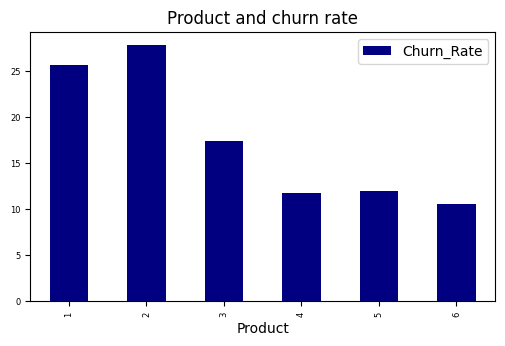

In [ ]:
product_churn.plot(kind='bar', x='Product', y='Churn_Rate',
                  title = 'Product and churn rate',
                  color='navy',
                  fontsize= 6,
                  figsize=(6,3.5),)

As the total relationship count increases, the churn rate decreases. This indicates that customers with multiple products or services with a company are more likely to remain loyal customers. Whilst customers with 2 or less products are likely to leave and seek services from competitors. Customers with 2 or less products should be the main target consumers to drive rentation rate.

**Customer activiness and churn rate**

In [ ]:
inactivity= pd.read_sql_query("""
SELECT
Months_Inactive_12_mon AS Months_Inactive,
COUNT (*) AS Total_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS
Attrited_Accounts,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS FLOAT))/COUNT(*)*100
AS Churn_Rate,
SUM(CAST(Attrition_Flag = 'Existing Customer'AS FLOAT))/COUNT(*)*100
AS Retention_Rate
FROM `df_sql`
GROUP BY Months_Inactive
ORDER BY Months_Inactive ASC
""", conn)


In [ ]:
cm = sns.light_palette("darkorange", as_cmap=True)
inactivity.style.background_gradient(cmap=cm)

,Months_Inactive,Total_Accounts,Attrited_Accounts,Churn_Rate,Retention_Rate
0,0,29,15,51.724138,48.275862
1,1,2233,100,4.478280,95.521720
2,2,3282,505,15.386959,84.613041
3,3,3846,826,21.476859,78.523141
4,4,435,130,29.885057,70.114943
5,5,178,32,17.977528,82.022472
6,6,124,19,15.322581,84.677419


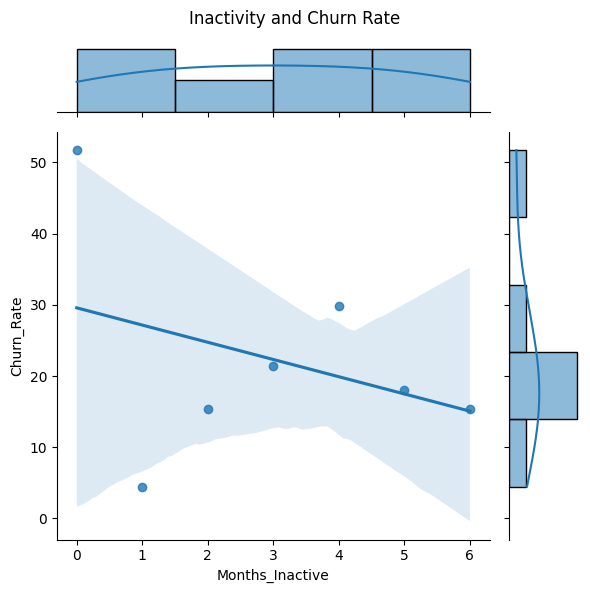

In [ ]:

sns.jointplot(x='Months_Inactive', y='Churn_Rate',
              data=inactivity,
              kind='reg')
plt.suptitle("Inactivity and Churn Rate")
plt.subplots_adjust(top=0.77)
plt.tight_layout()

The results suggest that at 0 month of activity the churn rate was the highest. At first glance this might seem quite high, however,  the total number of accounts inactive at 0 month are just 0.28% of the customer base. The churn rate drops by about 47% at 1 month inactivity and peak again at 4 months inactivity. Suggesting that there is no linear correlation between months inactive and churn rate.

**Credit Limit utilisation and churn rate**

Text(0.5, 1.0, 'Credit Limit vs Total Transaction Amount')

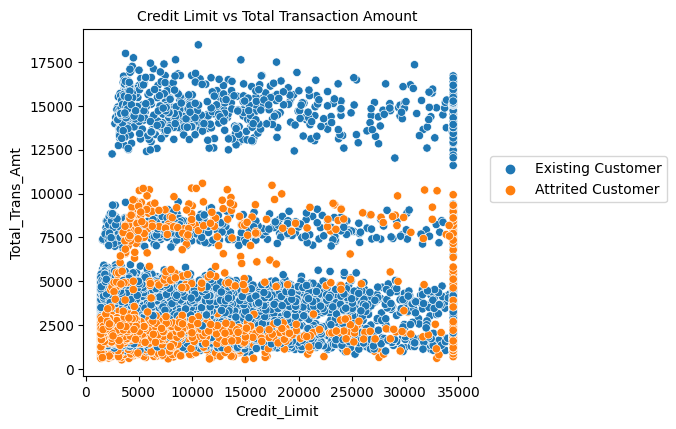

In [ ]:
plt.figure(figsize=(5,4.5))
x=sns.scatterplot(x="Credit_Limit",
                y="Total_Trans_Amt",
                data=bank_churners,
                hue= "Attrition_Flag")
plt.legend(loc=(1.05, 0.5))
x.set_title("Credit Limit vs Total Transaction Amount", fontsize=10)

For transcations amount of 12500-17500, there are no attrited customer

Text(0.5, 1.0, 'Open to buy and Credit Limit')

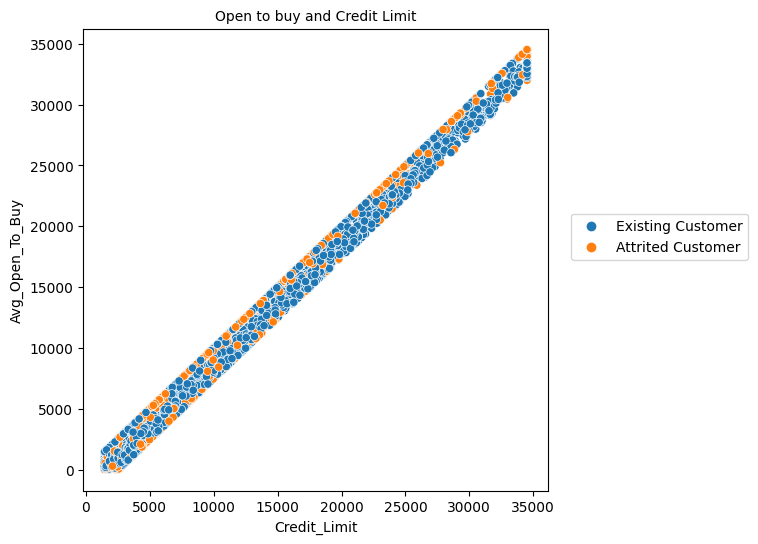

In [ ]:
plt.figure(figsize=(6,6))
x=sns.scatterplot(x="Credit_Limit",
                y="Avg_Open_To_Buy",
                data=bank_churners,
                hue= "Attrition_Flag")
plt.legend(loc=(1.05, 0.5))
x.set_title("Open to buy and Credit Limit", fontsize=10)


<ipython-input-17-607f918ff1c2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank_churners.corr(), annot = True, fmt = '.0%')


<Axes: >

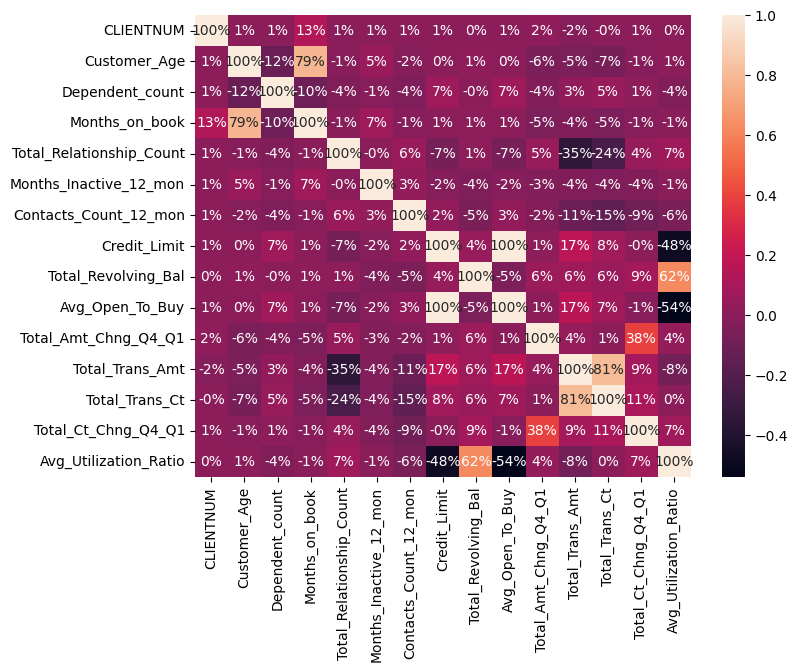

In [ ]:
#Heat map
plt.subplots(figsize=(8,6))
sns.heatmap(bank_churners.corr(), annot = True, fmt = '.0%')


Strong positive the correlations at 100% between credit limit and Avg open to buy, indicating that customers are more likely to utilise their credit cards when the credit limit is high. This may be cause credit card utilisation affects credit scores. The higher the credit limit, the better the margin for utilisation is.